# Question 1

Name: Cam Le Messurier
St No: 3301398

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import confusion_matrix
from numpy.random import seed


Setting sensible default for graphing libraries

In [121]:
plt.style.use('default')
matplotlib.rcParams['figure.figsize'] = (6, 4)
matplotlib.rc('image', cmap='RdBu')
sns.set_palette('Reds')
seed(1)

The following code block contains functions adapted from Arden Dertat.

`plot_decision_boundary` displays predicted values and actual values over a 2D plane. This helps visualise the model's decision boundaries. It just takes the max and min of each of the input vectors and calculates a grid. It then used the model to predict values, which are then displayed as contour lines. The actual y values are overload on top. 

`plot_confusion_matrix` predicts classes based on the input and compares it to the actual values.

In [111]:

def plot_decision_boundary(func, X, y):
    min_input = min(X.min(axis=0)) - 0.1
    max_input = max(X.max(axis=0) + 0.1)
    input_range = np.linspace(min_input, max_input, 100)
    aa, bb = np.meshgrid(input_range, input_range)
    ab = np.c_[aa.ravel(), bb.ravel()]
    c = func(ab)
    cc = c.reshape(aa.shape)
    cm_bright = ListedColormap(['#ff0000','#009dff'])
    contour = plt.contourf(aa, bb, cc, alpha=0.8)   
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.xlim(min_input, max_input)
    plt.ylim(min_input, max_input)
    plt.title('Model Visualisation')
    plt.ylabel('y coordinate')
    plt.xlabel('x coordinate')




def plot_confusion_matrix(model, X, y):
    y_pred = (model.predict(X) > 0.5).astype("int32")
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', alpha=0.8, vmin=0)

`plot_accuracy` displays the accuracy of the algorithm over each iteration. This shows how the algorithm is learning over time. This can only be applied to the NN. 

In [112]:
def plot_accuracy(fit):

    plt.plot(fit.history['accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.show()

Reading the data into a pandas dataframe, having a quick look at it, then converting to numpy array.  

In [26]:
spiral_data = pd.read_csv("./data/Q1/spiralsdataset.csv")
spiral_data.head()



6.50000  0.00000  0
0 -6.50000 -0.00000  1
1  6.31380  1.25590  0
2 -6.31380 -1.25590  1
3  5.88973  2.43961  0
4 -5.88973 -2.43961  1

In [27]:
spiral_data = spiral_data.values

Seperating the inputs values from the target values. 

In [28]:
X = spiral_data[:,0:2]
y = spiral_data[:,2]

Displaying the all the targets over the 2D inputs.

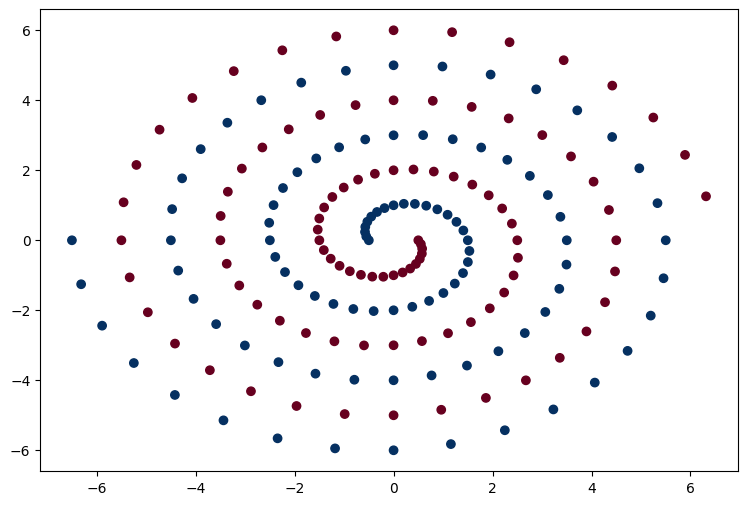

In [29]:

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

Creating the initial NN model using keras.

Cuurently, we are training the model using all the data, with no seperation for test data. This is generally considered a bad practice, as in reality, it is hard to determine how well the model generalises and if it is overfitting. Is the model actually learning how to classify inputs, or is it just learning to predict the specific data it was given to train? In the case of the two spiral task, how well the model generalises can be inspected visually; the clearer and cleaner the spirals, the better the classifier. 



As far as inputs go, there are only two; the x coordinate and the y coordinate. 

From the display of the data, we can see that it is not linearly seperable. As such the model must include at least one hidden layers if it is to be able to predict the target with a reasonable degree of accuracy. 

In [138]:

model = keras.Sequential()
model.add(keras.layers.Dense(100, input_shape=(2,), activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(X, y, verbose=0, epochs=50)

model.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_249 (Dense)            (None, 100)               300       
_________________________________________________________________
dense_250 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_251 (Dense)            (None, 1)                 51        
Total params: 5,401
Trainable params: 5,401
Non-trainable params: 0
_________________________________________________________________


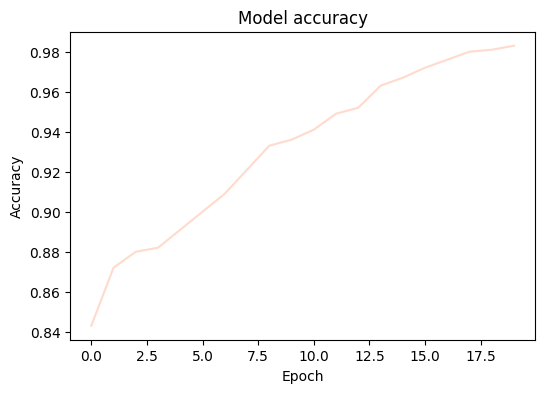

In [139]:
plot_accuracy(history)

### Two spiral Task - Number of hidden layers

Deep learning is still in relative infancy and there is many open questions and varying opinions on the best number of hidden layers and/or neurons. There are lots of heuristics proposed such as:
- Number of neurons:
    - Should be between the size of the input layer and output layer
    - Should decrease in subsequent layers 
    - Should be the square root of the product of the input layer size and the output layers
- The number of hidden layers:
    - For less complex dataset with fewer dimensions/features, between 1-3 layers
    - For more complex datasets, 3-6 layers
    - Keep adding layers until the test error does not improve anymore.

However, much like nueral networks, these sometimes sturggle to generalise to all machine learning problems. 

As such, will conduct loose empirical study to attempt to find the right number of layers for the two spiral task.

The overal number of hidden neurons will be kept the same, however the number of layers will change. 

total number of nuerons 500. 

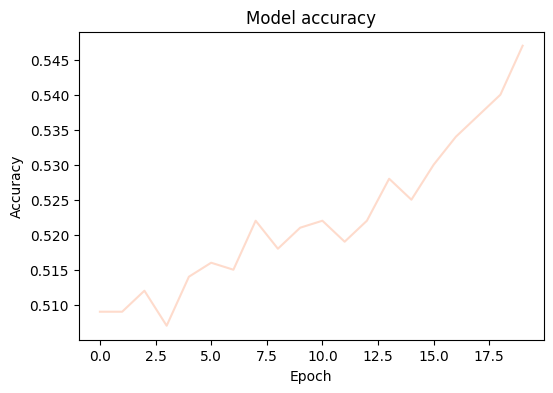

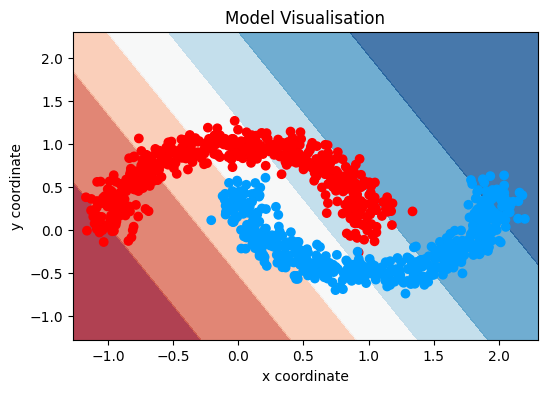

In [144]:
model = keras.Sequential()
model.add(keras.layers.Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(X, y, verbose=0, epochs=20)
plot_accuracy(history)
plot_decision_boundary(lambda x: model.predict(x), X, y)

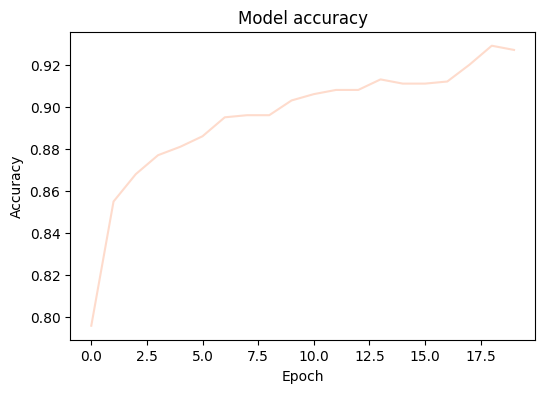

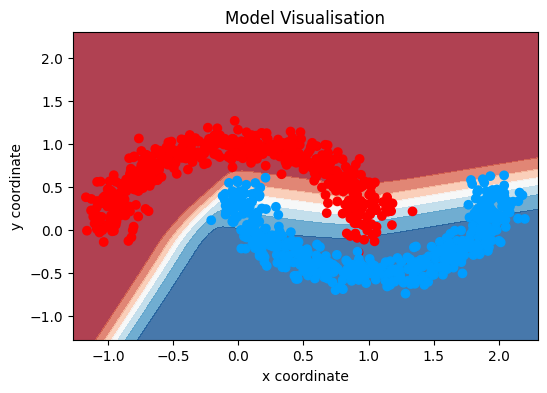

In [141]:
model = keras.Sequential()
model.add(keras.layers.Dense(500, input_shape=(2,), activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(X, y, verbose=0, epochs=20)
plot_accuracy(history)
plot_decision_boundary(lambda x: model.predict(x), X, y)

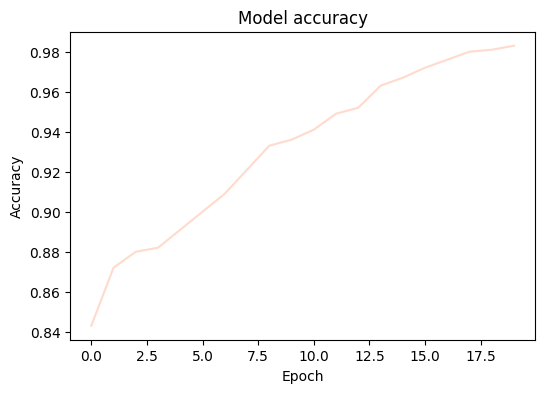

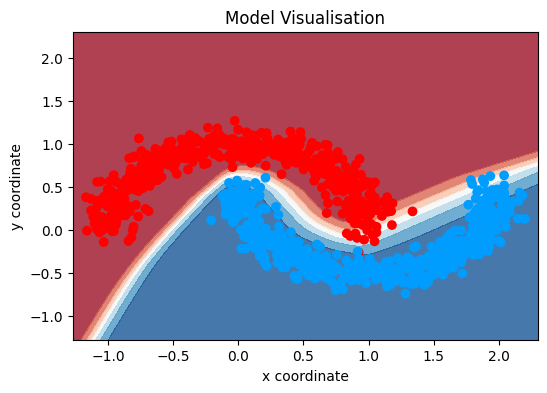

In [140]:
model = keras.Sequential()
model.add(keras.layers.Dense(500, input_shape=(2,), activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(X, y, verbose=0, epochs=20)
plot_accuracy(history)
plot_decision_boundary(lambda x: model.predict(x), X, y)

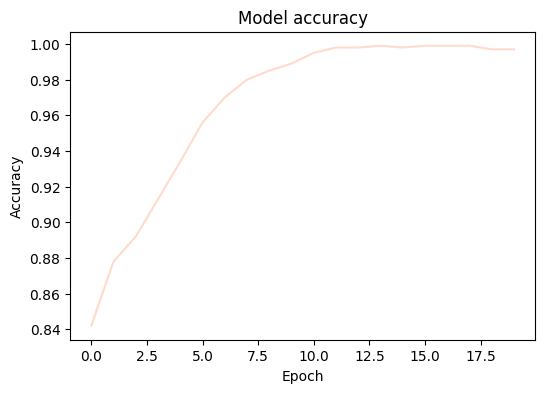

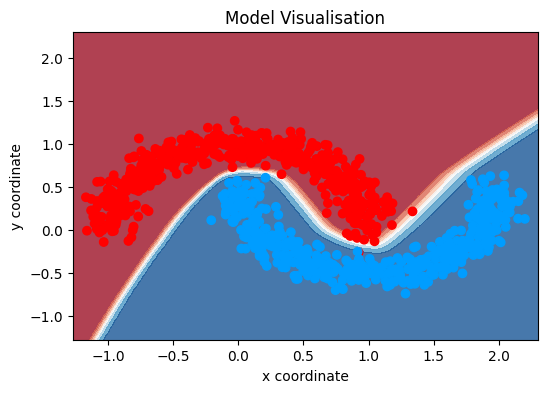

In [145]:
model = keras.Sequential()
model.add(keras.layers.Dense(400, input_shape=(2,), activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(X, y, verbose=0, epochs=20)
plot_accuracy(history)
plot_decision_boundary(lambda x: model.predict(x), X, y)

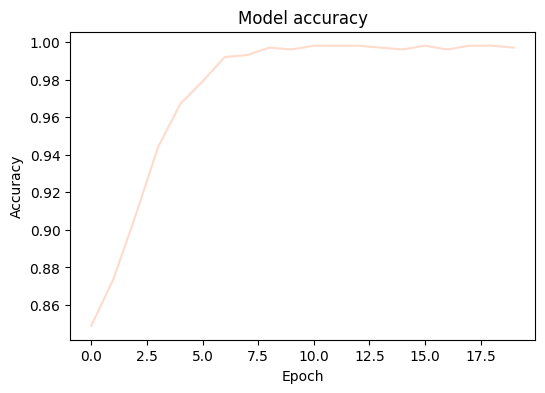

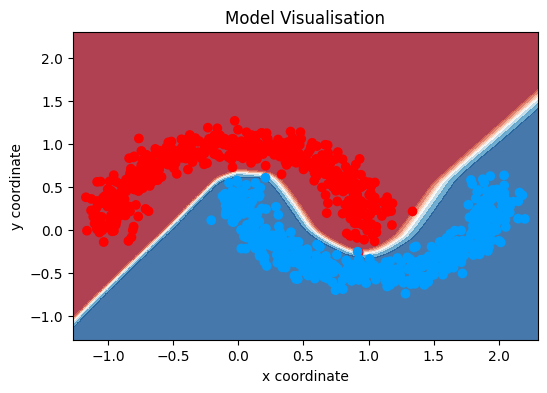

In [146]:
model = keras.Sequential()
model.add(keras.layers.Dense(225, input_shape=(2,), activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(25, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(X, y, verbose=0, epochs=20)
plot_accuracy(history)
plot_decision_boundary(lambda x: model.predict(x), X, y)

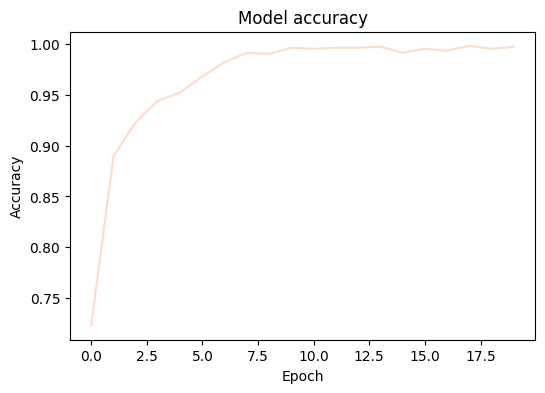

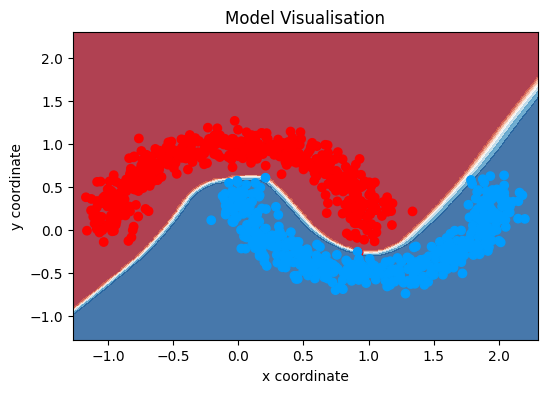

In [158]:
model = keras.Sequential()
model.add(keras.layers.Dense(227, input_shape=(2,), activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(X, y, verbose=0, epochs=20)
plot_accuracy(history)
plot_decision_boundary(lambda x: model.predict(x), X, y)

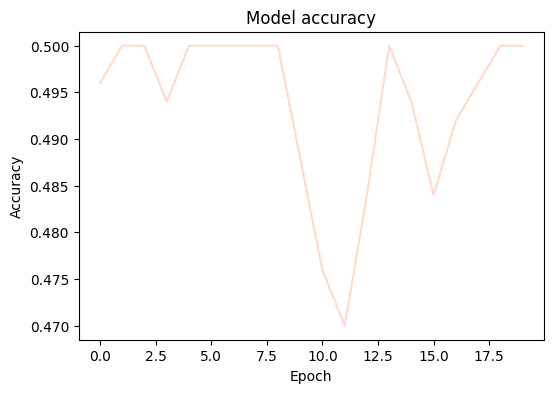

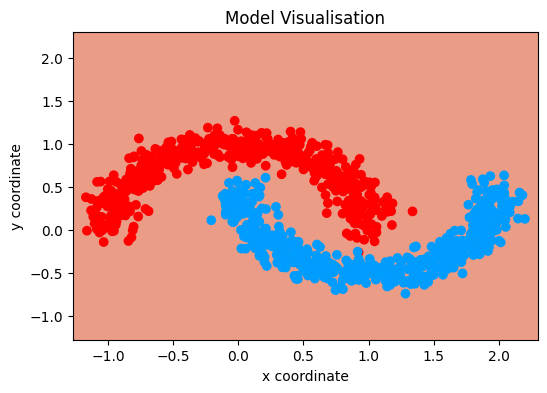

In [159]:
model = keras.Sequential()
model.add(keras.layers.Dense(82, input_shape=(2,), activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(X, y, verbose=0, epochs=20)
plot_accuracy(history)
plot_decision_boundary(lambda x: model.predict(x), X, y)

## Testing epoch size

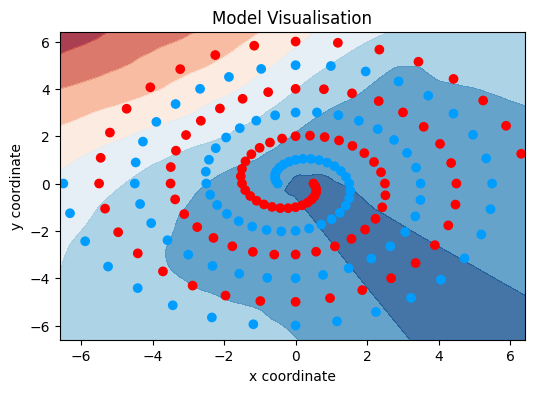

In [107]:
model_epoch = keras.Sequential()
model_epoch.add(keras.layers.Dense(600, input_shape=(2,), activation='relu'))
model_epoch.add(keras.layers.Dense(100, activation='relu'))
model_epoch.add(keras.layers.Dense(100, activation='relu'))
model_epoch.add(keras.layers.Dense(50, activation='relu'))
model_epoch.add(keras.layers.Dense(6, activation='relu'))
model_epoch.add(keras.layers.Dense(1, activation='sigmoid'))
model_epoch.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model_epoch.fit(X, y, verbose=0, epochs=1)
## plot_accuracy(history)
plot_decision_boundary(lambda x: model_epoch.predict(x), X, y)

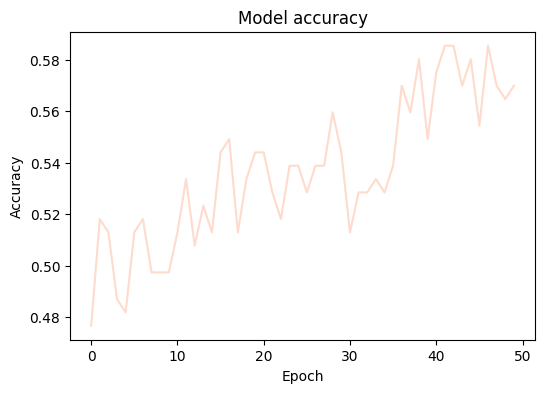

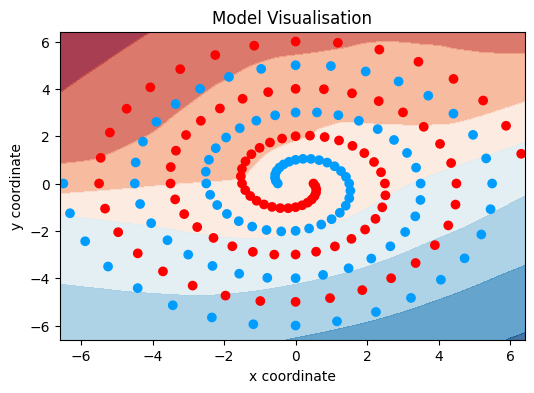

In [113]:
model_epoch = keras.Sequential()
model_epoch.add(keras.layers.Dense(600, input_shape=(2,), activation='relu'))
model_epoch.add(keras.layers.Dense(100, activation='relu'))
model_epoch.add(keras.layers.Dense(100, activation='relu'))
model_epoch.add(keras.layers.Dense(50, activation='relu'))
model_epoch.add(keras.layers.Dense(6, activation='relu'))
model_epoch.add(keras.layers.Dense(1, activation='sigmoid'))
model_epoch.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model_epoch.fit(X, y, verbose=0, epochs=50) 
plot_accuracy(history)
plot_decision_boundary(lambda x: model_epoch.predict(x), X, y)

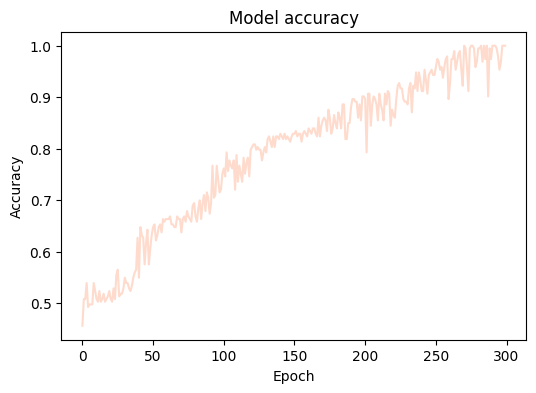

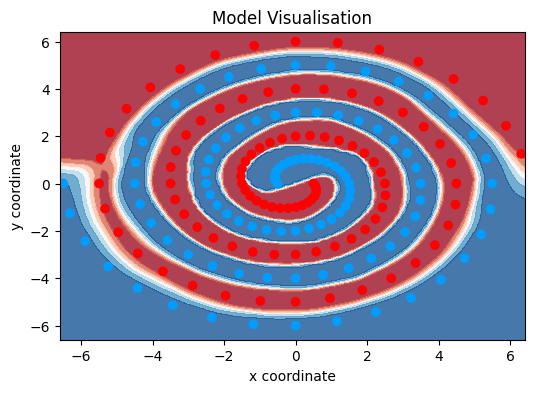

In [114]:
model_epoch = keras.Sequential()
model_epoch.add(keras.layers.Dense(600, input_shape=(2,), activation='relu'))
model_epoch.add(keras.layers.Dense(100, activation='relu'))
model_epoch.add(keras.layers.Dense(100, activation='relu'))
model_epoch.add(keras.layers.Dense(50, activation='relu'))
model_epoch.add(keras.layers.Dense(6, activation='relu'))
model_epoch.add(keras.layers.Dense(1, activation='sigmoid'))
model_epoch.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model_epoch.fit(X, y, verbose=0, epochs=300) 
plot_accuracy(history)
plot_decision_boundary(lambda x: model_epoch.predict(x), X, y)

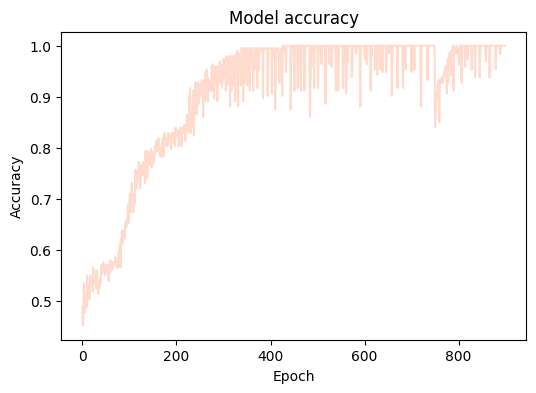

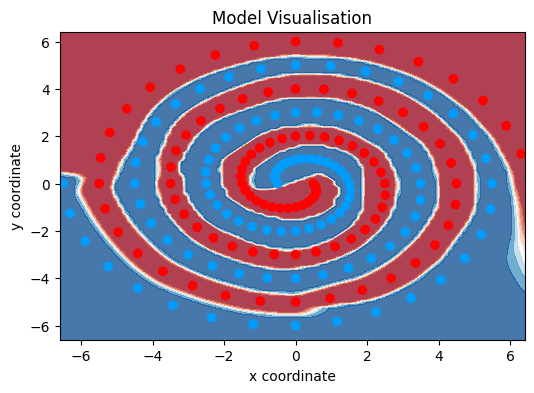

In [118]:
model_epoch = keras.Sequential()
model_epoch.add(keras.layers.Dense(600, input_shape=(2,), activation='relu'))
model_epoch.add(keras.layers.Dense(100, activation='relu'))
model_epoch.add(keras.layers.Dense(100, activation='relu'))
model_epoch.add(keras.layers.Dense(50, activation='relu'))
model_epoch.add(keras.layers.Dense(6, activation='relu'))
model_epoch.add(keras.layers.Dense(1, activation='sigmoid'))
model_epoch.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model_epoch.fit(X, y, verbose=0, epochs=900) 
plot_accuracy(history)
plot_decision_boundary(lambda x: model_epoch.predict(x), X, y)

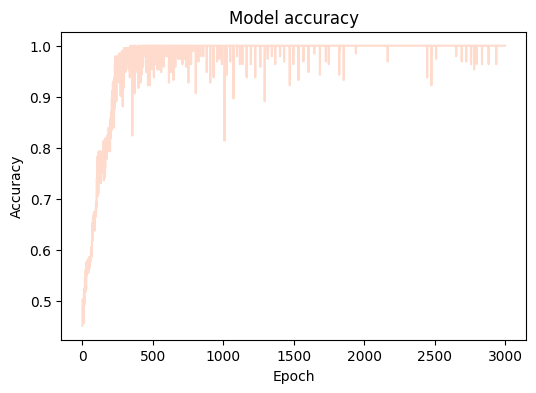

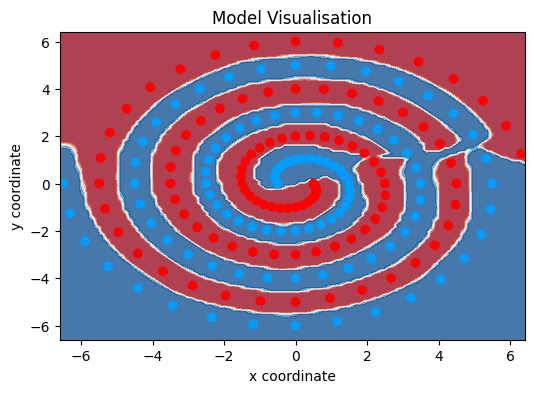

In [116]:
model_epoch = keras.Sequential()
model_epoch.add(keras.layers.Dense(600, input_shape=(2,), activation='relu'))
model_epoch.add(keras.layers.Dense(100, activation='relu'))
model_epoch.add(keras.layers.Dense(100, activation='relu'))
model_epoch.add(keras.layers.Dense(50, activation='relu'))
model_epoch.add(keras.layers.Dense(6, activation='relu'))
model_epoch.add(keras.layers.Dense(1, activation='sigmoid'))
model_epoch.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model_epoch.fit(X, y, verbose=0, epochs=3000) 
plot_accuracy(history)
plot_decision_boundary(lambda x: model_epoch.predict(x), X, y)

### Two Spirals - activation function

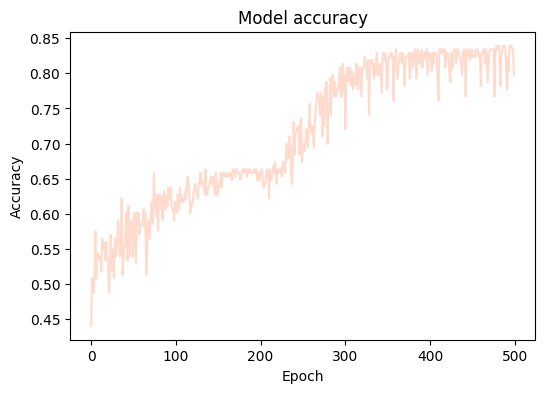

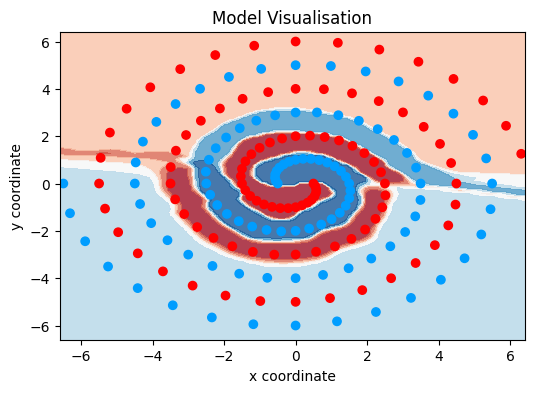

In [126]:
model_epoch = keras.Sequential()
model_epoch.add(keras.layers.Dense(600, input_shape=(2,), activation='tanh'))
model_epoch.add(keras.layers.Dense(100, activation='tanh'))
model_epoch.add(keras.layers.Dense(100, activation='tanh'))
model_epoch.add(keras.layers.Dense(50, activation='tanh'))
model_epoch.add(keras.layers.Dense(6, activation='tanh'))
model_epoch.add(keras.layers.Dense(1, activation='sigmoid'))
model_epoch.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model_epoch.fit(X, y, verbose=0, epochs=500) 
plot_accuracy(history)
plot_decision_boundary(lambda x: model_epoch.predict(x), X, y)

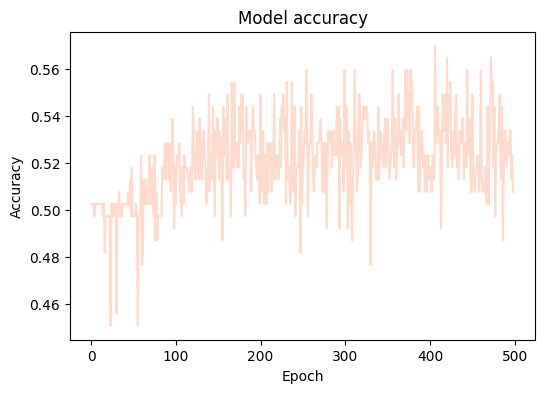

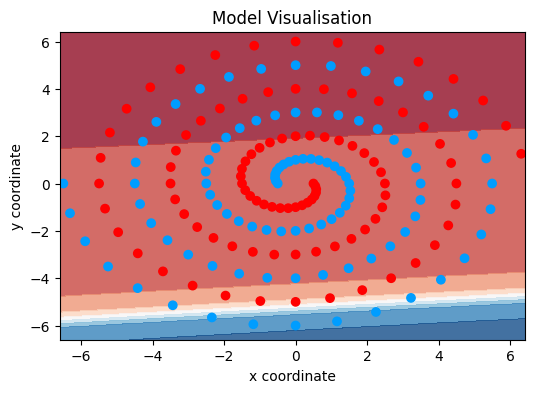

In [127]:
model_epoch = keras.Sequential()
model_epoch.add(keras.layers.Dense(600, input_shape=(2,), activation='sigmoid'))
model_epoch.add(keras.layers.Dense(100, activation='sigmoid'))
model_epoch.add(keras.layers.Dense(100, activation='sigmoid'))
model_epoch.add(keras.layers.Dense(50, activation='sigmoid'))
model_epoch.add(keras.layers.Dense(6, activation='sigmoid'))
model_epoch.add(keras.layers.Dense(1, activation='sigmoid'))
model_epoch.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model_epoch.fit(X, y, verbose=0, epochs=500) 
plot_accuracy(history)
plot_decision_boundary(lambda x: model_epoch.predict(x), X, y)

### Two spiral - SVM

In [130]:
svm = SVC(C=1000, kernel='rbf', gamma='auto')
history = svm.fit(X, y)

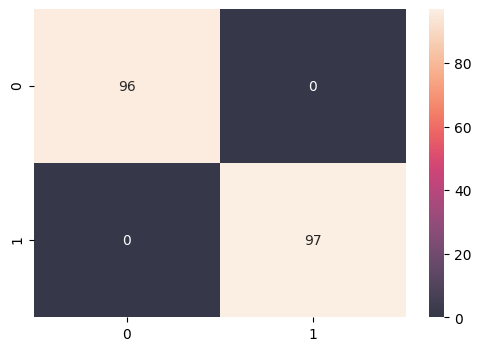

In [131]:
plot_confusion_matrix(svm, X, y)

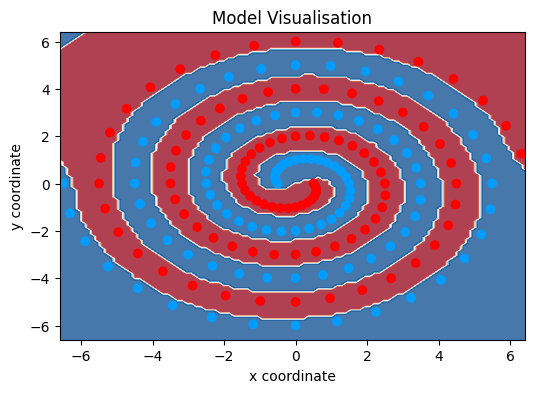

In [132]:
plot_decision_boundary(lambda x: svm.predict(x), X, y)

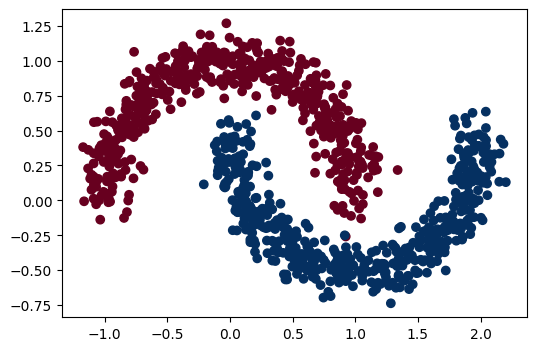

In [133]:
X, y = datasets.make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.scatter(X[:,0], X[:,1],c=y)
plt.show()

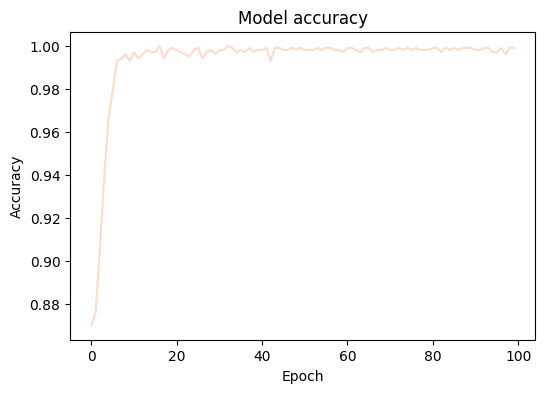

In [134]:
moon_history = model.fit(X, y, verbose=0, epochs=100)
plot_accuracy(moon_history)

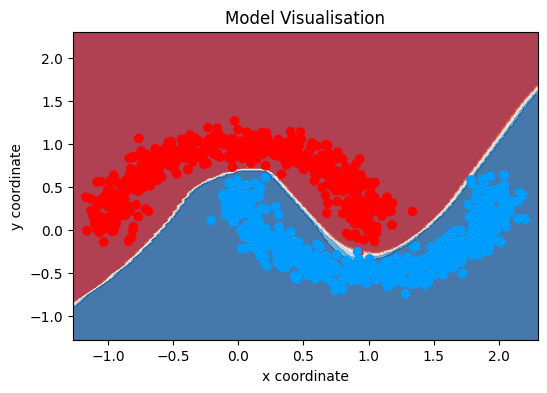

In [135]:
plot_decision_boundary(lambda x: model.predict(x), X, y)

In [136]:
svm.fit(X, y)

SVC(C=1000, gamma='auto')

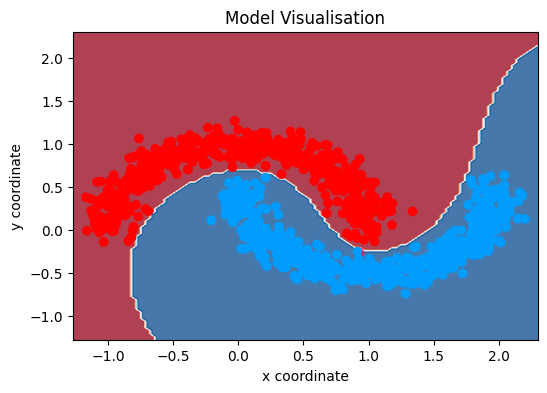

In [137]:
plot_decision_boundary(lambda x: svm.predict(x), X, y)